In [20]:
import numpy as np
import pandas as pd
import re




In [3]:
news_df = pd.read_csv("C:\\Users\\DELL\\Downloads\\news_dataset.csv")

In [4]:
news_df.head()

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [5]:
news_df.isnull().sum()

label    0
text     8
dtype: int64

In [6]:
news_df.dropna(subset=["text"],inplace=True)

In [7]:
news_df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
news_df = news_df.rename(columns={"text": "content"})


In [9]:
news_df.head()

,label,content
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...


In [10]:
news_df["label"].value_counts()

label
FAKE    1871
REAL    1850
Name: count, dtype: int64

[Text(0, 0, '1850'), Text(0, 0, '1871')]

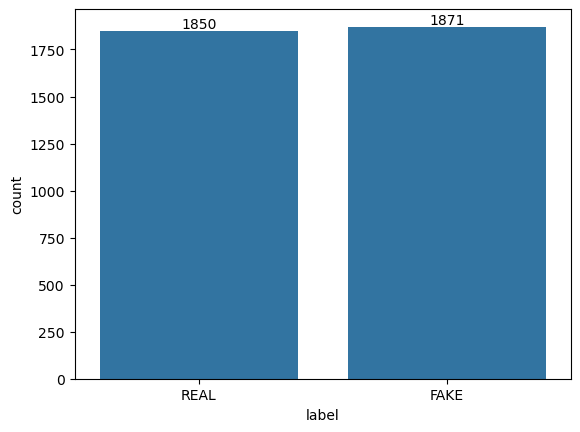

In [13]:
import seaborn as sns
ax =sns.countplot(data=news_df,x="label")
ax.bar_label(ax.containers[0])

In [14]:
from nltk.corpus import stopwords # the for of in with
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
news_df['content'] = news_df['content'].apply(stemming)

In [16]:
news_df.head()

,label,content
0,REAL,payal accus filmmak anurag kashyap behav inapp...
1,FAKE,four minut long video woman criticis govern an...
2,FAKE,republ poll fake twitter account imit arnab go...
3,REAL,delhi teen find place un green list turn glass...
4,REAL,delhi high level meet underway resid rajya sab...


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
news_df["label"]=le.fit_transform(news_df["label"])

In [18]:
news_df["label"]

0       1
1       0
2       0
3       1
4       1
       ..
3724    1
3725    1
3726    0
3727    1
3728    1
Name: label, Length: 3721, dtype: int32

In [19]:
y=news_df["label"]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X1=tf.fit_transform(news_df["content"]).toarray()

In [22]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X1,y,random_state=42,test_size=0.20)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score 
mn=MultinomialNB()

In [24]:
mn.fit(X_train,Y_train)
y_pred=mn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9543624161073826
0.9943502824858758
[[359   2]
 [ 32 352]]


In [49]:
import pickle 
pickle.dump(tf,open("tfidfssss.pkl","wb"))
pickle.dump(mn,open("mnssss.pkl","wb"))
pickle.dump(le, open("encoderssss.pkl",'wb'))